<a href="https://colab.research.google.com/github/faellataide/pycaret_churn/blob/main/Previs%C3%A3o_de_Churn_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Coleta de Dados**

In [1]:
#Acesso ao drive 
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#Importar a biblioteca de análise de dados
import pandas as pd

In [3]:
#Ler de dados do CSV
data = pd.read_csv('https://raw.githubusercontent.com/scudilio/Churn_model/master/dataset/Churn_Modelling.csv')
df = data


**2. Pré-Processamento dos Dados**

In [4]:
#Verificar o cabeçalho de dados
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Verificar os tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Deletar as colunas não úteis
data = data.drop(columns=['RowNumber','CustomerId','Surname'])

**3. Análise Exploratória**

In [7]:
#Verificar métricas da tabela
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


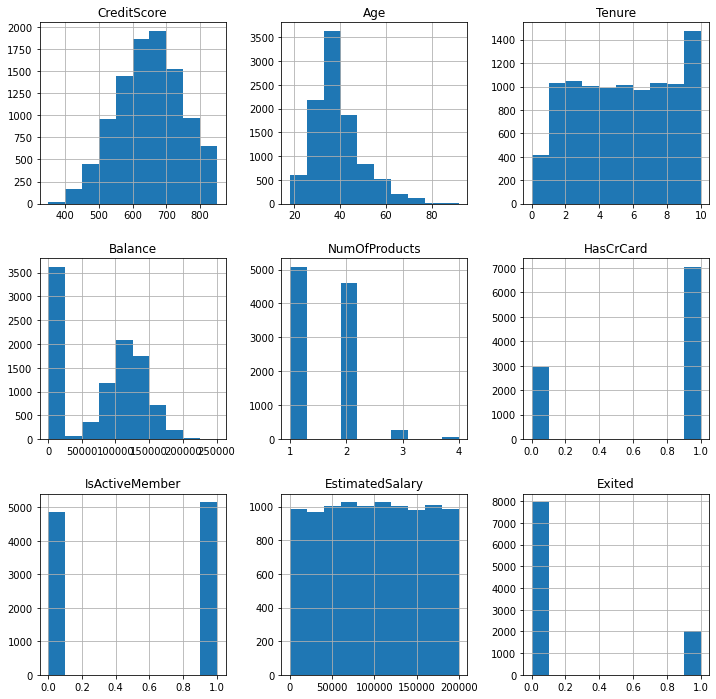

In [8]:
#Plotar o histograma
data.hist(figsize=(12,12));

**3.1. Variáveis Numéricas**

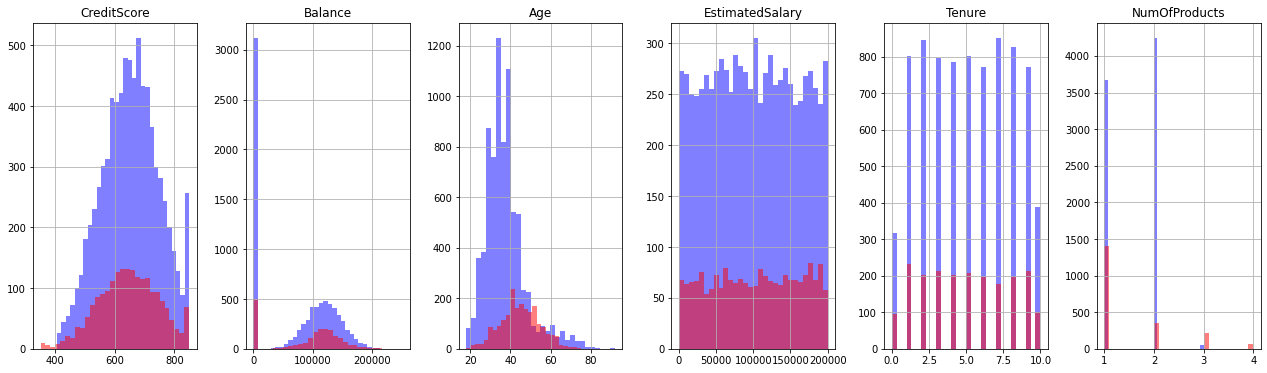

In [9]:
#Definir dataframe para comparar variáveis numpericas com a variável alvo
data['Exited_cat']=data['Exited'].replace([0,1],['Não','Sim'])
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure', 'NumOfProducts']
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 6, figsize=(22, 6));
data[data.Exited_cat == "Não"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
data[data.Exited_cat == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

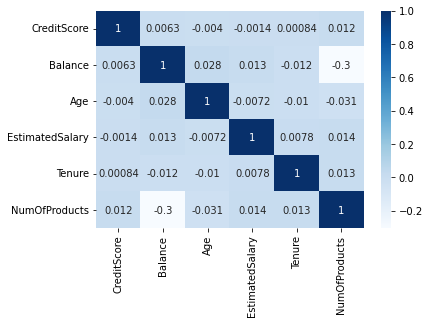

In [10]:
#Exibir matriz de correlação entre variáveis numéricas
import seaborn as sns
sns.heatmap(data[['CreditScore','Balance','Age','EstimatedSalary',
                  'Tenure','NumOfProducts']].corr(),annot=True,cmap='Blues');

Exited_cat
Não    651.853196
Sim    645.351497
Name: CreditScore, dtype: float64

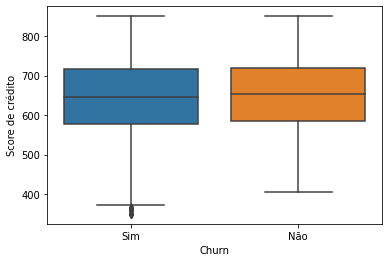

In [11]:
#Variável CREDITSCORE em relação a variável EXITED
sns.boxplot(x="Exited_cat", y="CreditScore" , data=data);
plt.xlabel('Churn');
plt.ylabel('Score de crédito');
data.groupby(['Exited_cat'])['CreditScore'].mean()

Text(0, 0.5, 'Taxa de Churn')

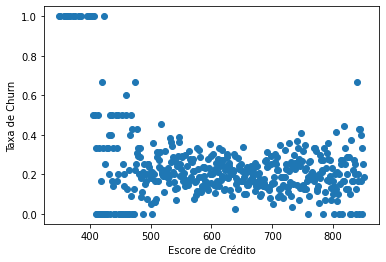

In [12]:
#Variável CREDITSCORE em relação a variável EXITED
data_plot = data.groupby('CreditScore').Exited.mean().reset_index() 
x =data_plot['CreditScore']
y=data_plot['Exited']
plt.scatter(x,y)
plt.xlabel('Escore de Crédito')
plt.ylabel('Taxa de Churn')

Exited_cat
Não    72745.296779
Sim    91108.539337
Name: Balance, dtype: float64

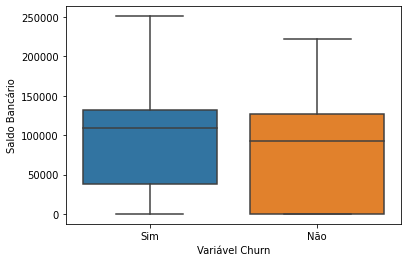

In [13]:
#Variável BALANCE em relação a variável EXITED
sns.boxplot(x="Exited_cat", y="Balance", data=data);
plt.xlabel('Variável Churn');
plt.ylabel('Saldo Bancário');
data.groupby(['Exited_cat'])['Balance'].mean()

Exited_cat
Não    37.408389
Sim    44.837997
Name: Age, dtype: float64

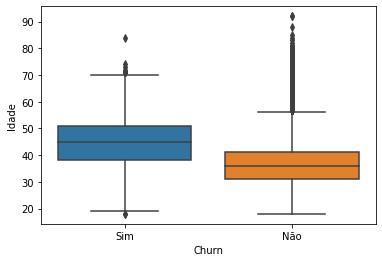

In [14]:
#Variável AGE em relação a variável EXITED
sns.boxplot(x="Exited_cat", y="Age" , data=data);
plt.xlabel('Churn');
plt.ylabel('Idade');
data.groupby(['Exited_cat'])['Age'].mean()

Text(0, 0.5, 'Taxa de Churn')

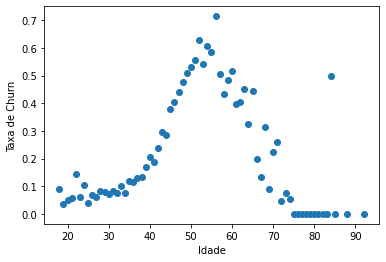

In [15]:
#Variável AGE em relação a variável EXITED
data_plot = data.groupby('Age').Exited.mean().reset_index() 
x = data_plot['Age']
y = data_plot['Exited']
plt.scatter(x,y)
plt.xlabel('Idade')
plt.ylabel('Taxa de Churn')

Exited_cat
Não     99738.391772
Sim    101465.677531
Name: EstimatedSalary, dtype: float64

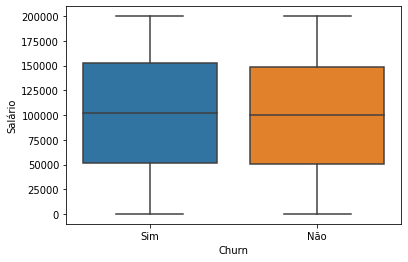

In [16]:
#Variável ESTIMATEDSALARY em relação a variável EXITED
sns.boxplot(x="Exited_cat", y="EstimatedSalary" , data=data);
plt.xlabel('Churn');
plt.ylabel('Salário');
data.groupby(['Exited_cat'])['EstimatedSalary'].mean()

Exited_cat
Não    5.033279
Sim    4.932744
Name: Tenure, dtype: float64

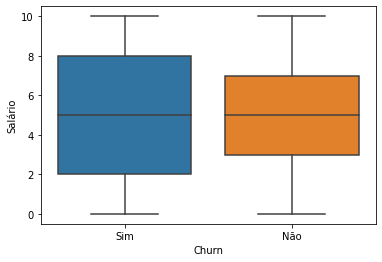

In [17]:
#Variável TENURE em relação a variável EXITED
sns.boxplot(x="Exited_cat", y="Tenure" , data=data);
plt.xlabel('Churn');
plt.ylabel('Salário');
data.groupby(['Exited_cat'])['Tenure'].mean()

Text(0, 0.5, 'Taxa de Churn')

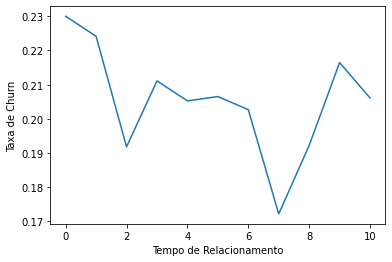

In [18]:
#Variável TENURE em relação a variável EXITED
data_plot = data.groupby('Tenure').Exited.mean().reset_index() 
x =data_plot['Tenure']
y=data_plot['Exited']
plt.plot(x,y)
plt.xlabel('Tempo de Relacionamento')
plt.ylabel('Taxa de Churn')

Exited_cat
Não    1.544267
Sim    1.475209
Name: NumOfProducts, dtype: float64

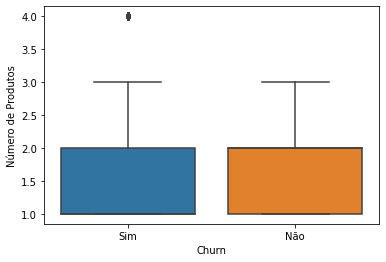

In [19]:
#Variável NUMOFPRODUCTS em relação a variável EXITED
sns.boxplot(x="Exited_cat", y="NumOfProducts" , data=data);
plt.xlabel('Churn');
plt.ylabel('Número de Produtos');
data.groupby(['Exited_cat'])['NumOfProducts'].mean()

Text(0, 0.5, 'Taxa de Churn')

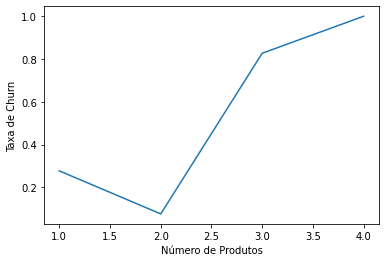

In [20]:
#Variável NUMOFPRODUCTS em relação a variável EXITED
data_plot = data.groupby('NumOfProducts').Exited.mean().reset_index() 
x =data_plot['NumOfProducts']
y=data_plot['Exited']
plt.plot(x,y)
plt.xlabel('Número de Produtos')
plt.ylabel('Taxa de Churn')

**3.2. Variáveis Categóricas**

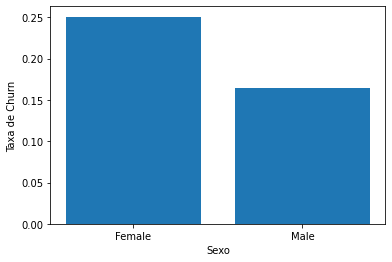

In [21]:
#Variável GENDER em relação a variável EXITED
data_plot = data.groupby('Gender').Exited.mean().reset_index() 
x=data_plot['Gender']
y=data_plot['Exited']
plt.bar(x,y);
plt.xlabel('Sexo');
plt.ylabel('Taxa de Churn');

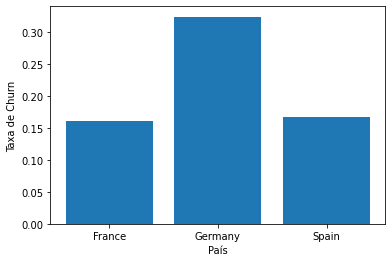

In [22]:
#Variável GEOGRAPHY em relação a variável EXITED
data_plot = data.groupby('Geography').Exited.mean().reset_index() 
x=data_plot['Geography']
y=data_plot['Exited']
plt.bar(x,y);
plt.xlabel('País');
plt.ylabel('Taxa de Churn');

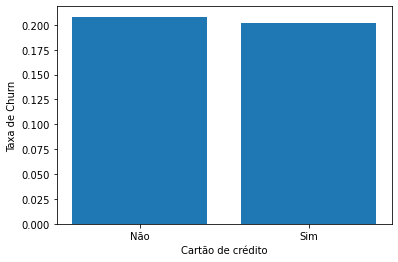

In [23]:
#Variável HASCRCARD em relação a variável EXITED
data['HasCrCard']=data['HasCrCard'].replace([0,1],['Não','Sim'])
data_plot = data.groupby('HasCrCard').Exited.mean().reset_index() 
x =data_plot['HasCrCard']
y=data_plot['Exited']
plt.bar(x,y);
plt.xlabel('Cartão de crédito');
plt.ylabel('Taxa de Churn');

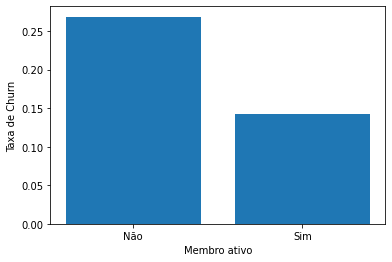

In [24]:
#Variável ISACTIVEMEMBER em relação a variável EXITED
data['IsActiveMember']=data['IsActiveMember'].replace([0,1],['Não','Sim'])
data_plot = data.groupby('IsActiveMember').Exited.mean().reset_index() 
x =data_plot['IsActiveMember']
y=data_plot['Exited']
plt.bar(x,y);
plt.xlabel('Membro ativo');
plt.ylabel('Taxa de Churn');

**3. Treinamento do Modelo**

In [25]:
#Instalando a biblioteca
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


In [ ]:
#Caso tenha problemas com o comando de "setup", execute conforme abaixo:
!pip install markupsafe==2.0.1
# na sequencia reinicie o ambiente de execução
#efetue a importação da biblioteca requisito
import jinja2
#rode novamente a leitura de dados a partir do início

In [27]:
# Iniciar o "setup"
from pycaret.classification import *
s = setup(df, target = 'Exited', ignore_features = ['RowNumber','CustomerId','Surname'])

,Description,Value
0,session_id,478
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 14)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [28]:
# Comparar todos os modelos
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8636,0.8649,0.4732,0.7650,0.5843,0.5081,0.5293,1.099
lightgbm,Light Gradient Boosting Machine,0.8634,0.8580,0.5042,0.7408,0.5996,0.5209,0.5351,0.166
rf,Random Forest Classifier,0.8611,0.8499,0.4676,0.7556,0.5770,0.4995,0.5204,1.609
ada,Ada Boost Classifier,0.8544,0.8471,0.4718,0.7131,0.5677,0.4846,0.4996,0.603
lda,Linear Discriminant Analysis,0.8407,0.8318,0.3690,0.7062,0.4838,0.4006,0.4305,0.040
et,Extra Trees Classifier,0.8415,0.8279,0.4324,0.6687,0.5248,0.4351,0.4501,0.862
nb,Naive Bayes,0.7870,0.7535,0.0923,0.3879,0.1480,0.0778,0.1039,0.038
dt,Decision Tree Classifier,0.7987,0.7023,0.5401,0.5037,0.5211,0.3939,0.3944,0.086
lr,Logistic Regression,0.7943,0.6781,0.0796,0.4454,0.1311,0.0783,0.1157,0.450
knn,K Neighbors Classifier,0.7625,0.5310,0.0768,0.2375,0.1157,0.0185,0.0226,0.189


In [29]:
# Exibir os parâmetros do melhor modelo
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=478, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [30]:
# Tunar o melhor modelo
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8657,0.8717,0.4859,0.7667,0.5948,0.5191,0.5385
1,0.8629,0.8646,0.4507,0.7805,0.5714,0.4967,0.5232
2,0.8557,0.8559,0.4789,0.7158,0.5738,0.4911,0.5055
3,0.8671,0.8741,0.4648,0.7952,0.5867,0.5139,0.5402
4,0.8771,0.8517,0.5141,0.8111,0.6293,0.5601,0.5810
5,0.8400,0.8499,0.3732,0.6974,0.4862,0.4016,0.4292
6,0.8529,0.8618,0.4296,0.7349,0.5422,0.4617,0.4853
7,0.8657,0.8657,0.4789,0.7727,0.5913,0.5162,0.5374
8,0.8700,0.8689,0.4789,0.8000,0.5991,0.5273,0.5521


**4. Avaliação do Modelo**

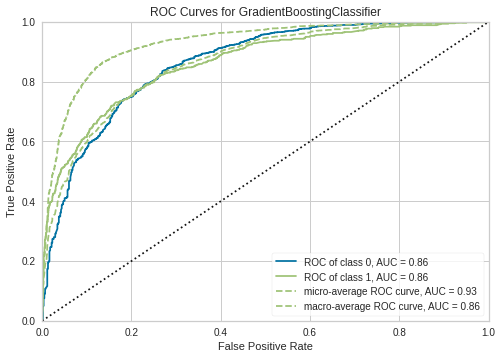

In [31]:
# Análise da Curva ROC
plot_model(tuned_best_model, plot = 'auc')

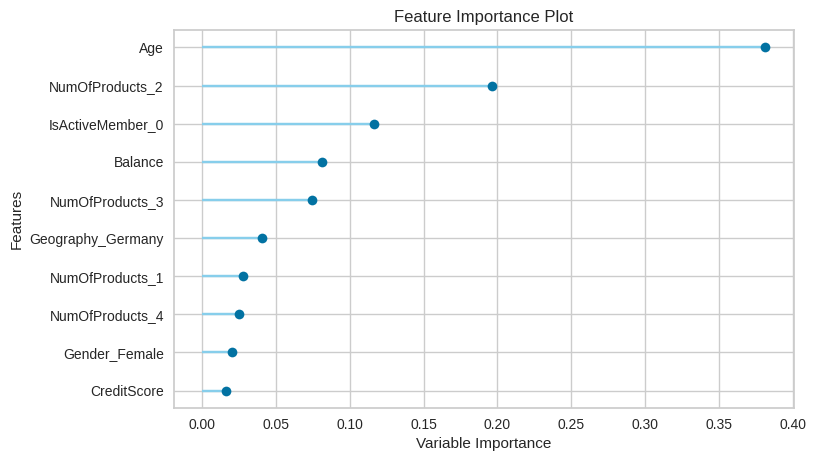

In [32]:
# Análise da importância de cada Feature
plot_model(tuned_best_model, plot = 'feature')

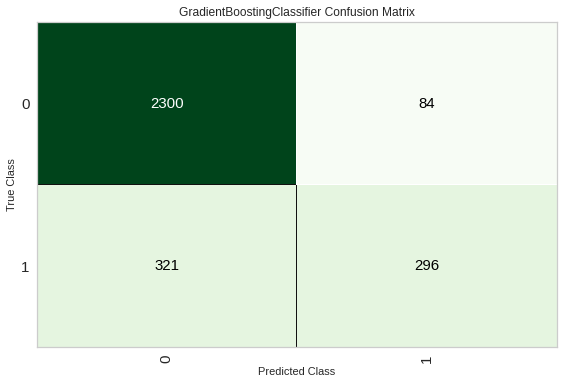

In [33]:
# Análise da Matriz de Confusão
plot_model(tuned_best_model, plot = 'confusion_matrix')